In [3]:
import pandas as pd

# Your example dataframe
data = {
    'Account': ['Jon', 'Jon', 'Stan', 'Stan', 'Jon', 'Stan', 'Jon'],
    'Date': ['12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/13/2023'],
    'Login': ['8:00:00', '', '14:00:00', '', '16:00:00', '15:00:00', '16:00:01'],
    'Logout': ['', '13:00:00', '', '15:00:00', '', '', ''],
    'Comp_num': [1, 1, 2, 2, 1, 1, 2]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort dataframe by 'Account', 'Date', and 'Comp_num'
df = df.sort_values(by=['Account', 'Date', 'Comp_num'])

# Group by 'Account' and 'Comp_num' and concatenate 'Login' and 'Logout' times
df['Login'] = df.groupby(['Account', 'Comp_num'])['Login'].transform('first')
df['Logout'] = df.groupby(['Account', 'Comp_num'])['Logout'].transform('last')

# Drop duplicate rows keeping only the first occurrence
df = df.drop_duplicates(subset=['Account', 'Date', 'Comp_num'], keep='first')

# Reset index
df = df.reset_index(drop=True)

print(df)


  Account       Date     Login    Logout  Comp_num
0     Jon 2023-12-12   8:00:00                   1
1     Jon 2023-12-13  16:00:01                   2
2    Stan 2023-12-12  15:00:00                   1
3    Stan 2023-12-12  14:00:00  15:00:00         2


In [4]:
import pandas as pd

# Your example dataframe
data = {
    'Account': ['Jon', 'Jon', 'Jon', 'Jon', 'Jon', 'Jon', 'Stan', 'Stan', 'Stan', 'Stan', 'Jon', 'Jon', 'Stan', 'Stan'],
    'Date': ['12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023',
             '12/12/2023', '12/12/2023', '12/13/2023', '12/14/2023', '12/14/2023', '12/15/2023', '12/16/2023'],
    'Login': ['8:00:00', '', '16:00:00', '', '17:00:00', '18:00:00', '14:00:00', '', '16:00:00', '17:30:00',
              '18:30:00', '', '19:00:00', '20:00:00'],
    'Logout': ['', '10:00:00', '', '16:03:00', '', '', '15:00:00', '16:00:00', '', '', '18:30:40', '', '', ''],
    'Comp_num': [1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 1, 1, 2, 2]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort dataframe by 'Account', 'Date', and 'Comp_num'
df = df.sort_values(by=['Account', 'Date', 'Comp_num']).reset_index(drop=True)

# Create a new dataframe to store the modified rows
new_rows = []

for index, row in df.iterrows():
    if index == 0:
        current_account = row['Account']
        current_comp_num = row['Comp_num']
        login_time = row['Login']
        logout_time = row['Logout']
    else:
        if row['Account'] == current_account and row['Comp_num'] == current_comp_num:
            if row['Login']:
                login_time = min(pd.to_datetime(row['Login']), pd.to_datetime(login_time))
            if row['Logout']:
                logout_time = max(pd.to_datetime(row['Logout']), pd.to_datetime(logout_time))
        else:
            new_rows.append([current_account, row['Date'], login_time, logout_time, current_comp_num])
            current_account = row['Account']
            current_comp_num = row['Comp_num']
            login_time = row['Login']
            logout_time = row['Logout']

# Add the last gathered data to the new dataframe
new_rows.append([current_account, row['Date'], login_time, logout_time, current_comp_num])

# Create a new dataframe from the modified rows
new_df = pd.DataFrame(new_rows, columns=['Account', 'Date', 'Login', 'Logout', 'Comp_num'])

print(new_df)


  Account       Date                Login              Logout  Comp_num
0     Jon 2023-12-12  2023-12-28 08:00:00 2023-12-28 18:30:40         1
1    Stan 2023-12-12             14:00:00 2023-12-28 16:00:00         2
2    Stan 2023-12-13             16:00:00                 NaT         3
3    Stan 2023-12-15             17:30:00                 NaT         4
4    Stan 2023-12-16  2023-12-28 19:00:00                 NaT         2


C:\Users\dotto\AppData\Local\Temp/ipykernel_23008/1868746230.py:48: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  new_df = pd.DataFrame(new_rows, columns=['Account', 'Date', 'Login', 'Logout', 'Comp_num'])


In [13]:
import pandas as pd

# Your example dataframe
data = {
    'Account': ['Jon', 'Jon', 'Jon', 'Jon', 'Jon', 'Jon', 'Stan', 'Stan', 'Stan', 'Stan', 'Jon', 'Jon', 'Stan', 'Stan'],
    'Date': ['12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023',
             '12/12/2023', '12/12/2023', '12/13/2023', '12/14/2023', '12/14/2023', '12/15/2023', '12/16/2023'],
    'Login': ['8:00:00', '', '16:00:00', '', '17:00:00', '18:00:00', '14:00:00', '', '16:00:00', '17:30:00',
              '18:30:00', '', '19:00:00', '20:00:00'],
    'Logout': ['', '10:00:00', '', '16:03:00', '', '', '15:00:00', '16:00:00', '', '', '18:30:40', '', '', ''],
    'Comp_num': [1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 1, 1, 2, 2]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort dataframe by 'Account', 'Date', and 'Comp_num'
df = df.sort_values(by=['Account', 'Date', 'Comp_num'])

# Initialize new DataFrame to store modified data
new_data = {'Account': [], 'Date': [], 'Login': [], 'Logout': [], 'Comp_num': []}

# Iterate through rows
for index, row in df.iterrows():
    if row['Login']:  # If Login time is present
        if not new_data['Account'] or new_data['Account'][-1] != row['Account'] or new_data['Comp_num'][-1] != row['Comp_num']:
            # If new Account or Comp_num encountered, append new row
            new_data['Account'].append(row['Account'])
            new_data['Date'].append(row['Date'])
            new_data['Login'].append(row['Login'])
            new_data['Comp_num'].append(row['Comp_num'])
            new_data['Logout'].append('')  # Set Logout time as empty for now
        else:
            # If same Account and Comp_num, update the corresponding row with Logout time
            idx = len(new_data['Account']) - 1
            new_data['Logout'][idx] = row['Login']  # Assign Login time as Logout time

# Create the modified DataFrame
modified_df = pd.DataFrame(new_data)

print(modified_df)


  Account       Date     Login    Logout  Comp_num
0     Jon 2023-12-12   8:00:00  16:00:00         1
1     Jon 2023-12-13  16:00:01                   2
2    Stan 2023-12-12  15:00:00                   1
3    Stan 2023-12-12  14:00:00                   2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Account': ['Jon', 'Jon', 'Stan', 'Stan', 'Jon', 'Stan', 'Jon'],
    'Date': ['12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/13/2023'],
    'Login': ['8:00:00', '', '14:00:00', '', '16:00:00', '15:00:00', '16:00:01'],
    'Logout': ['', '13:00:00', '', '15:00:00', '', '', ''],
    'Comp_num': [1, 1, 2, 2, 1, 1, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Date', 'Login', and 'Logout' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Login'] = pd.to_datetime(df['Login'], errors='coerce')
df['Logout'] = pd.to_datetime(df['Logout'], errors='coerce')

# Sort the DataFrame by 'Date' and 'Login' time within groups of 'Account' and 'Comp_num'
df = df.sort_values(by=['Account', 'Comp_num', 'Date', 'Login'])

# Calculate duration between login and logout times
df['Duration'] = df['Logout'] - df['Login']

# Plotting
fig, ax = plt.subplots()

# Iterate over each group (account, computer number)
for name, group in df.groupby(['Account', 'Comp_num']):
    # Extract login and logout times
    login_times = group['Login'].dt.time
    logout_times = group['Logout'].dt.time

    # Plot login and logout times for each group
    ax.plot(group['Date'], login_times, marker='o', linestyle='-', label=f'{name} - Login')
    ax.plot(group['Date'], logout_times, marker='o', linestyle='-', label=f'{name} - Logout')

# Set plot labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Time')
ax.set_title('Login and Logout Times')

# Display legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Display the modified DataFrame
print(df)

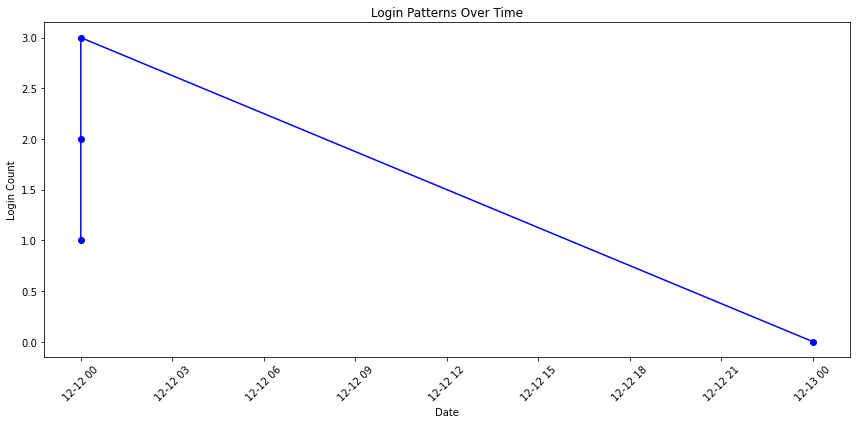

In [3]:
import matplotlib.pyplot as plt

# Assuming 'new_df' contains the relevant data
# Convert 'Date' column to datetime if it's not already in datetime format
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Sort dataframe by 'Date'
new_df = new_df.sort_values(by='Date')

# Plotting login patterns over time
plt.figure(figsize=(12, 6))
plt.plot(new_df['Date'], new_df.index, marker='o', linestyle='-', color='b')
plt.title('Login Patterns Over Time')
plt.xlabel('Date')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


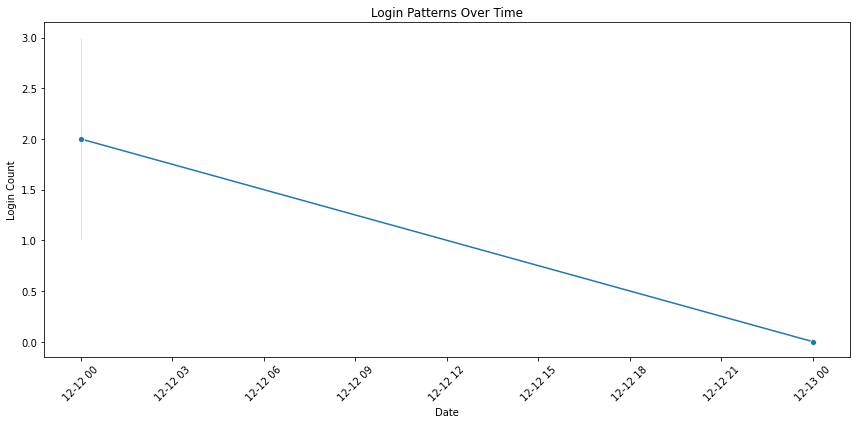

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_df' contains the relevant data
# Convert 'Date' column to datetime if it's not already in datetime format
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Sort dataframe by 'Date'
new_df = new_df.sort_values(by='Date')

# Plotting login patterns over time using Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y=new_df.index, data=new_df, marker='o')
plt.title('Login Patterns Over Time')
plt.xlabel('Date')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


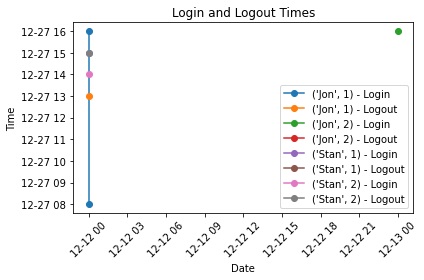

  Account       Date               Login              Logout  Comp_num  \
0     Jon 2023-12-12 2023-12-27 08:00:00                 NaT         1   
4     Jon 2023-12-12 2023-12-27 16:00:00                 NaT         1   
1     Jon 2023-12-12                 NaT 2023-12-27 13:00:00         1   
6     Jon 2023-12-13 2023-12-27 16:00:01                 NaT         2   
5    Stan 2023-12-12 2023-12-27 15:00:00                 NaT         1   
2    Stan 2023-12-12 2023-12-27 14:00:00                 NaT         2   
3    Stan 2023-12-12                 NaT 2023-12-27 15:00:00         2   

  Duration  
0      NaT  
4      NaT  
1      NaT  
6      NaT  
5      NaT  
2      NaT  
3      NaT  


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Account': ['Jon', 'Jon', 'Stan', 'Stan', 'Jon', 'Stan', 'Jon'],
    'Date': ['12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/13/2023'],
    'Login': ['8:00:00', '', '14:00:00', '', '16:00:00', '15:00:00', '16:00:01'],
    'Logout': ['', '13:00:00', '', '15:00:00', '', '', ''],
    'Comp_num': [1, 1, 2, 2, 1, 1, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Date', 'Login', and 'Logout' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Login'] = pd.to_datetime(df['Login'], errors='coerce')
df['Logout'] = pd.to_datetime(df['Logout'], errors='coerce')

# Sort the DataFrame by 'Date' and 'Login' time within groups of 'Account' and 'Comp_num'
df = df.sort_values(by=['Account', 'Comp_num', 'Date', 'Login'])

# Calculate duration between login and logout times
df['Duration'] = df['Logout'] - df['Login']

# Plotting
fig, ax = plt.subplots()

# Iterate over each group (account, computer number)
for name, group in df.groupby(['Account', 'Comp_num']):
    # Extract login and logout times
    login_dates = group['Date']
    login_times = group['Login']
    logout_times = group['Logout']

    # Plot login and logout times for each group
    ax.plot(login_dates, login_times, marker='o', linestyle='-', label=f'{name} - Login')
    ax.plot(login_dates, logout_times, marker='o', linestyle='-', label=f'{name} - Logout')

# Set plot labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Time')
ax.set_title('Login and Logout Times')

# Display legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Display the modified DataFrame
print(df)


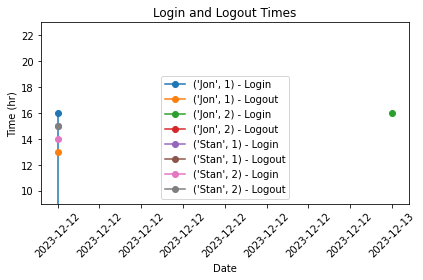

  Account       Date               Login              Logout  Comp_num
0     Jon 2023-12-12 2023-12-27 08:00:00                 NaT         1
4     Jon 2023-12-12 2023-12-27 16:00:00                 NaT         1
1     Jon 2023-12-12                 NaT 2023-12-27 13:00:00         1
6     Jon 2023-12-13 2023-12-27 16:00:01                 NaT         2
5    Stan 2023-12-12 2023-12-27 15:00:00                 NaT         1
2    Stan 2023-12-12 2023-12-27 14:00:00                 NaT         2
3    Stan 2023-12-12                 NaT 2023-12-27 15:00:00         2


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Given data
data = {
    'Account': ['Jon', 'Jon', 'Stan', 'Stan', 'Jon', 'Stan', 'Jon'],
    'Date': ['12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/13/2023'],
    'Login': ['8:00:00', '', '14:00:00', '', '16:00:00', '15:00:00', '16:00:01'],
    'Logout': ['', '13:00:00', '', '15:00:00', '', '', ''],
    'Comp_num': [1, 1, 2, 2, 1, 1, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Date', 'Login', and 'Logout' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Login'] = pd.to_datetime(df['Login'], errors='coerce')
df['Logout'] = pd.to_datetime(df['Logout'], errors='coerce')

# Sort the DataFrame by 'Date' and 'Login' time within groups of 'Account' and 'Comp_num'
df = df.sort_values(by=['Account', 'Comp_num', 'Date', 'Login'])

# Plotting
fig, ax = plt.subplots()

# Iterate over each group (account, computer number)
for name, group in df.groupby(['Account', 'Comp_num']):
    # Extract login and logout times
    login_dates = group['Date']
    login_times = group['Login'].apply(lambda x: x.hour + x.minute / 60 if pd.notnull(x) else None)
    logout_times = group['Logout'].apply(lambda x: x.hour + x.minute / 60 if pd.notnull(x) else None)

    # Plot login and logout times for each group
    ax.plot(login_dates, login_times, marker='o', linestyle='-', label=f'{name} - Login')
    ax.plot(login_dates, logout_times, marker='o', linestyle='-', label=f'{name} - Logout')

# Set plot labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Time (hr)')
ax.set_title('Login and Logout Times')

# Set x-axis format as Date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set y-axis limits and format as Time (09:00 to 23:00)
ax.set_ylim(9, 23)

# Display legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Display the modified DataFrame
print(df)


ConversionError: Failed to convert value(s) to axis units: datetime.time(9, 0)

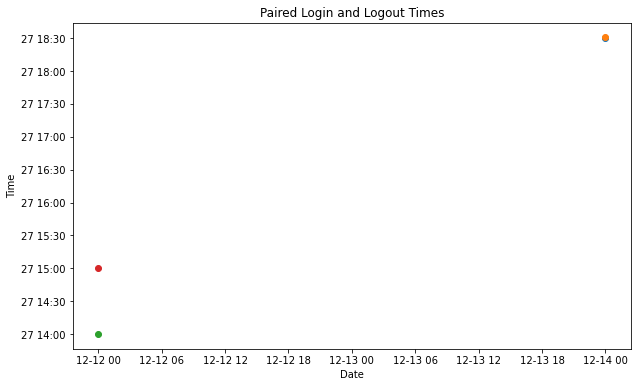

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Account': ['Jon', 'Jon', 'Jon', 'Jon', 'Jon', 'Jon', 'Stan', 'Stan', 'Stan', 'Stan', 'Jon', 'Jon', 'Stan', 'Stan'],
    'Date': ['12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023',
             '12/12/2023', '12/12/2023', '12/13/2023', '12/14/2023', '12/14/2023', '12/15/2023', '12/16/2023'],
    'Login': ['8:00:00', '', '16:00:00', '', '17:00:00', '18:00:00', '14:00:00', '', '16:00:00', '17:30:00',
              '18:30:00', '', '19:00:00', '20:00:00'],
    'Logout': ['', '10:00:00', '', '16:03:00', '', '', '15:00:00', '16:00:00', '', '', '18:30:40', '', '', ''],
    'Comp_num': [1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 1, 1, 2, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Date', 'Login', and 'Logout' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Login'] = pd.to_datetime(df['Login'], errors='coerce').dt.time
df['Logout'] = pd.to_datetime(df['Logout'], errors='coerce').dt.time

# Pair up login and logout times by account and computer number
paired_df = df.dropna(subset=['Login', 'Logout']).reset_index(drop=True)

# Calculate duration between login and logout times
paired_df['Login'] = pd.to_datetime(paired_df['Login'].astype(str))
paired_df['Logout'] = pd.to_datetime(paired_df['Logout'].astype(str))
paired_df['Duration'] = paired_df['Logout'] - paired_df['Login']

# Plotting paired login and logout times
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group (account, computer number)
for name, group in paired_df.groupby(['Account', 'Comp_num']):
    # Extract login and logout times
    login_times = group['Login']
    logout_times = group['Logout']

    # Plot login and logout times for each group
    ax.plot(group['Date'], login_times, marker='o', linestyle='-', label=f'{name} - Login')
    ax.plot(group['Date'], logout_times, marker='o', linestyle='-', label=f'{name} - Logout')

# Set plot labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Time')
ax.set_title('Paired Login and Logout Times')

# Set y-axis limits as Time (09:00 to 20:00)
ax.set_ylim(pd.to_datetime('1900-01-01 09:00:00').time(), pd.to_datetime('1900-01-01 20:00:00').time())

# Display legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plotting duration by time per each user
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each user (account)
for name, group in paired_df.groupby('Account'):
    # Extract duration and login times
    durations = group['Duration'].dt.total_seconds() / 3600  # Convert duration to hours
    login_times = group['Login']

    # Plot duration by time for each user
    ax.plot(login_times, durations, marker='o', linestyle='-', label=name)

# Set plot labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Duration (hours)')
ax.set_title('Duration by Time per User')
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<bound method Artist.set of <AxesSubplot:>>

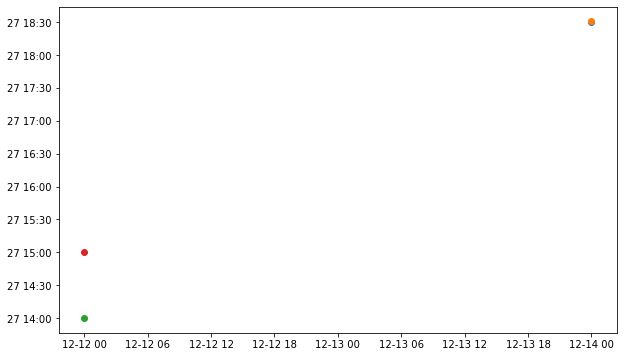

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Account': ['Jon', 'Jon', 'Jon', 'Jon', 'Jon', 'Jon', 'Stan', 'Stan', 'Stan', 'Stan', 'Jon', 'Jon', 'Stan', 'Stan'],
    'Date': ['12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023', '12/12/2023',
             '12/12/2023', '12/12/2023', '12/13/2023', '12/14/2023', '12/14/2023', '12/15/2023', '12/16/2023'],
    'Login': ['8:00:00', '', '16:00:00', '', '17:00:00', '18:00:00', '14:00:00', '', '16:00:00', '17:30:00',
              '18:30:00', '', '19:00:00', '20:00:00'],
    'Logout': ['', '10:00:00', '', '16:03:00', '', '', '15:00:00', '16:00:00', '', '', '18:30:40', '', '', ''],
    'Comp_num': [1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 1, 1, 2, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Date', 'Login', and 'Logout' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Login'] = pd.to_datetime(df['Login'], errors='coerce').dt.time
df['Logout'] = pd.to_datetime(df['Logout'], errors='coerce').dt.time

# Pair up login and logout times by account and computer number
paired_df = df.dropna(subset=['Login', 'Logout']).reset_index(drop=True)

# Calculate duration between login and logout times
paired_df['Login'] = pd.to_datetime(paired_df['Login'].astype(str))
paired_df['Logout'] = pd.to_datetime(paired_df['Logout'].astype(str))
paired_df['Duration'] = paired_df['Logout'] - paired_df['Login']

# Plotting paired login and logout times
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group (account, computer number)
for name, group in paired_df.groupby(['Account', 'Comp_num']):
    # Extract login and logout times
    login_times = group['Login']
    logout_times = group['Logout']

    # Plot login and logout times for each group
    ax.plot(group['Date'], login_times, marker='o', linestyle='-', label=f'{name} - Login')
    ax.plot(group['Date'], logout_times, marker='o', linestyle='-', label=f'{name} - Logout')

# Set plot labels and title
ax.set
